# **LUNG CANCER PREDICTION**

# **Powered by 42RandomState**

#### In this project, we developed a **cancer prediction** model using advanced machine learning techniques. After testing various algorithms (Logistic Regression, Random Forest, SVM, Gradient Boosting, Decision Tree, and XGBoost), we selected the best models through RandomizedSearchCV for hyperparameter optimization. We then combined the top models (Random Forest and Gradient Boosting) using ensemble techniques: Voting and Stacking. To further improve performance, we fine-tuned the classification threshold by analyzing the ROC Curve and optimizing it based on Youden’s J statistic. The final model achieves an F1 Score of 0.98 on the test set, with an AUC of 0.996, demonstrating excellent predictive performance and a strong balance between precision and recall.

## **1) INSTALL OLD LIBRARY FOR COMPATIBILITY**

In [1]:
#install old libraries for compatibility
!pip uninstall -y scikit-learn
!pip uninstall -y category-encoders
!pip uninstall -y imbalanced-learn

!pip install scikit-learn==1.1.3
!pip install imbalanced-learn==0.9.1


!pip show scikit-learn
!pip show imbalanced-learn

Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2
Found existing installation: category_encoders 2.7.0
Uninstalling category_encoders-2.7.0:
  Successfully uninstalled category_encoders-2.7.0
Found existing installation: imbalanced-learn 0.13.0
Uninstalling imbalanced-learn-0.13.0:
  Successfully uninstalled imbalanced-learn-0.13.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.0/32.0 MB 46.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
nilearn 0.11.1 requires scikit-learn>=1.4.0, but you have scikit-learn 1.1.3 which is incompatible.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.1.3 which is incompatible.
bigframes 1.36.0 requires rich<14,>=12.4.4, but you have rich 14.0.0 which is incompatible.
bigframes 1.36.0 requires scikit-l

### **All correct, let's deep into the data**

## **2) ANALYZE AND WORK ON DATA**

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('/kaggle/input/lung-cancer/survey lung cancer.csv')

2025-04-26 12:46:32.167179: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745671592.455769      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745671592.543432      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [5]:
data.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [6]:
data.shape

(309, 16)

In [7]:
data.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [8]:
data.duplicated().sum()

33

In [9]:
data.drop_duplicates(inplace=True)
data.shape

(276, 16)

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['LUNG_CANCER']=encoder.fit_transform(data['LUNG_CANCER'])
data['GENDER']=encoder.fit_transform(data['GENDER'])
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


#### **the classes are unbalanced, so we can use RandomOverSampler**

In [11]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

X=data.drop(['LUNG_CANCER'],axis=1)
y=data['LUNG_CANCER']
X_over,y_over=RandomOverSampler().fit_resample(X,y)

X_train,X_test,y_train,y_test = train_test_split(X_over, y_over, random_state=42, stratify=y_over)

In [12]:
#NOW RECHECK IF CLASSES ARE UNBALANCED 
import pandas as pd
print(pd.Series(y_train).value_counts(normalize=True))

LUNG_CANCER
1    0.501401
0    0.498599
Name: proportion, dtype: float64


In [13]:
print(f'Train shape : {X_train.shape}\nTest shape: {X_test.shape}')

Train shape : (357, 15)
Test shape: (119, 15)


In [14]:
#SCALING THE AGE COLUMN
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train['AGE']=scaler.fit_transform(X_train[['AGE']])
X_test['AGE']=scaler.transform(X_test[['AGE']])
X_train.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
321,0,0.946397,2,1,1,1,2,2,1,1,1,1,2,1,1
336,0,-0.674053,2,1,2,1,1,2,1,1,1,1,1,1,1
334,1,0.743841,2,1,1,1,1,1,2,2,2,2,1,1,2
151,0,0.237450,2,2,1,2,2,1,1,1,1,1,1,1,1
314,0,-0.674053,2,1,2,1,1,2,1,1,1,1,1,1,1


## **3) TRAIN AND EVALUATE DIFFERENT MODEL**

### **Logistic Regression**

In [15]:
# TRAIN A LOGISTIC REGRESSION CLASSIFIER WITH RANDOMIZEDSEARCHCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, classification_report
from scipy.stats import uniform, randint
from sklearn.model_selection import cross_val_predict

log_reg_clf = Pipeline([
    ("log_reg_clf", LogisticRegression(class_weight="balanced", random_state=42, max_iter=1000)),
])

param_dist = {
    'log_reg_clf__C': uniform(0.1, 10),
    'log_reg_clf__penalty': ['l1', 'l2'], 
    'log_reg_clf__solver': ['liblinear', 'saga'], 
}

random_search = RandomizedSearchCV(
    log_reg_clf, param_distributions=param_dist, n_iter=100, cv=3, verbose=0, random_state=42, n_jobs=1
)

random_search.fit(X_train, y_train)

best_log_reg_clf = random_search.best_estimator_

y_train_pred_log_reg = cross_val_predict(best_log_reg_clf, X_train, y_train, cv=3)

print(f"Confusion matrix for Logistic Regression classifier:\n {confusion_matrix(y_train, y_train_pred_log_reg)}")

print(f"Recall: {recall_score(y_train, y_train_pred_log_reg)}")
print(f"Precision:  {precision_score(y_train, y_train_pred_log_reg)}")
print(f"F1 Score: {f1_score(y_train, y_train_pred_log_reg)}")

print("Classification Report, Logistic Regression:")
print(classification_report(y_train, y_train_pred_log_reg))


Confusion matrix for Logistic Regression classifier:
 [[168  10]
 [ 20 159]]
Recall: 0.888268156424581
Precision:  0.9408284023668639
F1 Score: 0.9137931034482758
Classification Report, Logistic Regression:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92       178
           1       0.94      0.89      0.91       179

    accuracy                           0.92       357
   macro avg       0.92      0.92      0.92       357
weighted avg       0.92      0.92      0.92       357



## **Random Forest classifier**

In [16]:
# TRAIN A RANDOM FOREST CLASSIFIER WITH RANDOMIZEDSEARCHCV
from sklearn.ensemble import RandomForestClassifier

rf_clf = Pipeline([
    ("rf_clf", RandomForestClassifier(class_weight="balanced", random_state=42)),
])

param_dist = {
    'rf_clf__n_estimators': randint(50, 200), 
    'rf_clf__max_depth': randint(1, 20), 
    'rf_clf__min_samples_split': randint(2, 20),  
    'rf_clf__min_samples_leaf': randint(1, 20), 
    'rf_clf__max_features': ['auto', 'sqrt', 'log2'],  
    'rf_clf__bootstrap': [True, False], 
}

random_search = RandomizedSearchCV(
    rf_clf, param_distributions=param_dist, n_iter=100, cv=3, verbose=0, random_state=42, n_jobs=1
)

random_search.fit(X_train, y_train)

best_rf_clf = random_search.best_estimator_

y_train_pred_rf = cross_val_predict(best_rf_clf, X_train, y_train, cv=3)

print(f"Confusion matrix for Random Forest classifier:\n {confusion_matrix(y_train, y_train_pred_rf)}")

print(f"Recall: {recall_score(y_train, y_train_pred_rf)}")
print(f"Precision:  {precision_score(y_train, y_train_pred_rf)}")
print(f"F1 Score: {f1_score(y_train, y_train_pred_rf)}")

print("Classification Report, Random Forest:")
print(classification_report(y_train, y_train_pred_rf))


Confusion matrix for Random Forest classifier:
 [[178   0]
 [ 19 160]]
Recall: 0.8938547486033519
Precision:  1.0
F1 Score: 0.943952802359882
Classification Report, Random Forest:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       178
           1       1.00      0.89      0.94       179

    accuracy                           0.95       357
   macro avg       0.95      0.95      0.95       357
weighted avg       0.95      0.95      0.95       357



## **SVM**

In [17]:
# TRAIN A SUPPORT VECTOR MACHINE (SVM) CLASSIFIER WITH RANDOMIZEDSEARCHCV
from sklearn.svm import SVC

svm_clf = Pipeline([
    ("svm_clf", SVC(class_weight="balanced", random_state=42, probability=True)),
])

param_dist = {
    'svm_clf__C': uniform(0.1, 10),  
    'svm_clf__gamma': uniform(0.001, 1),   
    'svm_clf__kernel': ['linear', 'poly', 'rbf'], 
    'svm_clf__degree': randint(1, 6),
}

random_search = RandomizedSearchCV(
    svm_clf, param_distributions=param_dist, n_iter=100, cv=3, verbose=0, random_state=42, n_jobs=1
)

random_search.fit(X_train, y_train)

best_svm_clf = random_search.best_estimator_

y_train_pred_svm = cross_val_predict(best_svm_clf, X_train, y_train, cv=3)

print(f"Confusion matrix for SVM classifier:\n {confusion_matrix(y_train, y_train_pred_svm)}")
print(f"Recall: {recall_score(y_train, y_train_pred_svm)}")
print(f"Precision:  {precision_score(y_train, y_train_pred_svm)}")
print(f"F1 Score: {f1_score(y_train, y_train_pred_svm)}")

print("Classification Report, SVM:")
print(classification_report(y_train, y_train_pred_svm))


Confusion matrix for SVM classifier:
 [[176   2]
 [  6 173]]
Recall: 0.9664804469273743
Precision:  0.9885714285714285
F1 Score: 0.9774011299435028
Classification Report, SVM:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       178
           1       0.99      0.97      0.98       179

    accuracy                           0.98       357
   macro avg       0.98      0.98      0.98       357
weighted avg       0.98      0.98      0.98       357



## **Gradient Boosting Classifier**

In [18]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = Pipeline([
    ("gb_clf", GradientBoostingClassifier(random_state=42)),
])

param_dist = {
    'gb_clf__n_estimators': randint(50, 200),
    'gb_clf__learning_rate': uniform(0.01, 0.3),
    'gb_clf__max_depth': randint(3, 12),
    'gb_clf__min_samples_split': randint(2, 20),
    'gb_clf__min_samples_leaf': randint(1, 20),
    'gb_clf__subsample': uniform(0.5, 1.0),
    'gb_clf__max_features': ['auto', 'sqrt', 'log2'],
}

random_search = RandomizedSearchCV(
    gb_clf, param_distributions=param_dist, n_iter=100, cv=3, verbose=0, random_state=42, n_jobs=1
)

random_search.fit(X_train, y_train)

best_gb_clf = random_search.best_estimator_

y_train_pred_gb = cross_val_predict(best_gb_clf, X_train, y_train, cv=3)

print(f"Confusion matrix for Gradient Boosting classifier:\n {confusion_matrix(y_train, y_train_pred_gb)}")
print(f"Recall: {recall_score(y_train, y_train_pred_gb)}")
print(f"Precision:  {precision_score(y_train, y_train_pred_gb)}")
print(f"F1 Score: {f1_score(y_train, y_train_pred_gb)}")
print("Classification Report, Gradient Boosting:")
print(classification_report(y_train, y_train_pred_gb))


Confusion matrix for Gradient Boosting classifier:
 [[174   4]
 [ 16 163]]
Recall: 0.9106145251396648
Precision:  0.9760479041916168
F1 Score: 0.9421965317919075
Classification Report, Gradient Boosting:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       178
           1       0.98      0.91      0.94       179

    accuracy                           0.94       357
   macro avg       0.95      0.94      0.94       357
weighted avg       0.95      0.94      0.94       357



## **Decision Tree**

In [19]:
# TRAIN A DECISION TREE CLASSIFIER WITH RANDOMIZEDSEARCHCV
from sklearn.tree import DecisionTreeClassifier

dt_clf = Pipeline([
    ("dt_clf", DecisionTreeClassifier(class_weight="balanced", random_state=42)),
])

param_dist = {
    'dt_clf__max_depth': randint(1, 20),  # Profondità massima degli alberi
    'dt_clf__min_samples_split': randint(2, 20),  # Minimo numero di campioni per dividere un nodo
    'dt_clf__min_samples_leaf': randint(1, 20),  # Minimo numero di campioni per essere una foglia
    'dt_clf__max_features': ['auto', 'sqrt', 'log2'],  # Numero massimo di caratteristiche da considerare per ogni divisione
    'dt_clf__criterion': ['gini', 'entropy'],  # Funzione di impurità
}

random_search = RandomizedSearchCV(
    dt_clf, param_distributions=param_dist, n_iter=100, cv=3, verbose=0, random_state=42, n_jobs=1
)

random_search.fit(X_train, y_train)

best_dt_clf = random_search.best_estimator_

y_train_pred_dt = cross_val_predict(best_dt_clf, X_train, y_train, cv=3)

print(f"Confusion matrix for Decision Tree classifier:\n {confusion_matrix(y_train, y_train_pred_dt)}")

print(f"Recall: {recall_score(y_train, y_train_pred_dt)}")
print(f"Precision:  {precision_score(y_train, y_train_pred_dt)}")
print(f"F1 Score: {f1_score(y_train, y_train_pred_dt)}")

print("Classification Report, Decision Tree:")
print(classification_report(y_train, y_train_pred_dt))


Confusion matrix for Decision Tree classifier:
 [[176   2]
 [ 19 160]]
Recall: 0.8938547486033519
Precision:  0.9876543209876543
F1 Score: 0.93841642228739
Classification Report, Decision Tree:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       178
           1       0.99      0.89      0.94       179

    accuracy                           0.94       357
   macro avg       0.95      0.94      0.94       357
weighted avg       0.95      0.94      0.94       357



## **XGB**

In [20]:
import xgboost as xgb

xgb_clf = Pipeline([
    ("xgb_clf", xgb.XGBClassifier(scale_pos_weight=1, random_state=42)),
])

param_dist = {
    'xgb_clf__learning_rate': uniform(0.01, 0.3),
    'xgb_clf__n_estimators': randint(50, 500),
    'xgb_clf__max_depth': randint(3, 20),
    'xgb_clf__min_child_weight': randint(1, 10),
    'xgb_clf__subsample': uniform(0.5, 1.0),
    'xgb_clf__colsample_bytree': uniform(0.5, 1.0),
    'xgb_clf__gamma': uniform(0, 1),
}

random_search = RandomizedSearchCV(
    xgb_clf, param_distributions=param_dist, n_iter=100, cv=3, verbose=0, random_state=42, n_jobs=1
)

random_search.fit(X_train, y_train)

best_xgb_clf = random_search.best_estimator_

y_train_pred_xgb = cross_val_predict(best_xgb_clf, X_train, y_train, cv=3)

print(f"Confusion matrix for XGBoost classifier:\n {confusion_matrix(y_train, y_train_pred_xgb)}")
print(f"Recall: {recall_score(y_train, y_train_pred_xgb)}")
print(f"Precision: {precision_score(y_train, y_train_pred_xgb)}")
print(f"F1 Score: {f1_score(y_train, y_train_pred_xgb)}")

print("Classification Report, XGBoost:")
print(classification_report(y_train, y_train_pred_xgb))


Confusion matrix for XGBoost classifier:
 [[174   4]
 [ 20 159]]
Recall: 0.888268156424581
Precision: 0.9754601226993865
F1 Score: 0.9298245614035088
Classification Report, XGBoost:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       178
           1       0.98      0.89      0.93       179

    accuracy                           0.93       357
   macro avg       0.94      0.93      0.93       357
weighted avg       0.94      0.93      0.93       357



In [21]:
#COMPARE ALL THE F1 SCORE
print(f"F1 Score Logistic Regression: {f1_score(y_train, y_train_pred_log_reg)}")
print(f"F1 Score Random Forest: {f1_score(y_train, y_train_pred_rf)}")
print(f"F1 Score SVM: {f1_score(y_train, y_train_pred_svm)}")
print(f"F1 Score Gradient Boosting: {f1_score(y_train, y_train_pred_gb)}")
print(f"F1 Score decision Tree: {f1_score(y_train, y_train_pred_dt)}")
print(f"F1 Score XGB: {f1_score(y_train, y_train_pred_xgb)}")

F1 Score Logistic Regression: 0.9137931034482758
F1 Score Random Forest: 0.943952802359882
F1 Score SVM: 0.9774011299435028
F1 Score Gradient Boosting: 0.9421965317919075
F1 Score decision Tree: 0.93841642228739
F1 Score XGB: 0.9298245614035088


### **We can see that Gradient Boosting e Ranfom Forest sono i modelli migliori**

## **5) We can try an essemble between Gradient Boosting and Random Forest**

In [22]:
from sklearn.ensemble import StackingClassifier

base_learners = [
    ('svm', best_svm_clf),
    ('gb', best_gb_clf),
    ('xgb', best_xgb_clf)
]

stacking_clf = StackingClassifier(
    estimators=base_learners,
    final_estimator=LogisticRegression(class_weight="balanced", random_state=42)
)

stacking_clf.fit(X_train, y_train)

y_train_pred_stacking = cross_val_predict(stacking_clf, X_train, y_train, cv=3)

print(f"Confusion matrix for stacking classifier:\n {confusion_matrix(y_train, y_train_pred_stacking)}")
print(f"Recall: {recall_score(y_train, y_train_pred_stacking)}")
print(f"Precision:  {precision_score(y_train, y_train_pred_stacking)}")
print(f"F1 Score: {f1_score(y_train, y_train_pred_stacking)}")
print("Classification Report, Stacking Classifier:")
print(classification_report(y_train, y_train_pred_stacking))


Confusion matrix for stacking classifier:
 [[176   2]
 [  8 171]]
Recall: 0.9553072625698324
Precision:  0.9884393063583815
F1 Score: 0.9715909090909092
Classification Report, Stacking Classifier:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       178
           1       0.99      0.96      0.97       179

    accuracy                           0.97       357
   macro avg       0.97      0.97      0.97       357
weighted avg       0.97      0.97      0.97       357



## Final Prediction on the test set

In [23]:
y_test_pred_stacking = cross_val_predict(stacking_clf, X_test, y_test, cv=3)

print(f"Confusion matrix for stacking classifier:\n {confusion_matrix(y_test, y_test_pred_stacking)}")
print(f"Recall: {recall_score(y_test, y_test_pred_stacking)}")
print(f"Precision:  {precision_score(y_test, y_test_pred_stacking)}")
print(f"F1 Score: {f1_score(y_test, y_test_pred_stacking)}")
print("Classification Report, Stacking Classifier:")
print(classification_report(y_test, y_test_pred_stacking))

Confusion matrix for stacking classifier:
 [[56  4]
 [10 49]]
Recall: 0.8305084745762712
Precision:  0.9245283018867925
F1 Score: 0.875
Classification Report, Stacking Classifier:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89        60
           1       0.92      0.83      0.88        59

    accuracy                           0.88       119
   macro avg       0.89      0.88      0.88       119
weighted avg       0.89      0.88      0.88       119



## **6) THESHOLD TUNING**

AUC Score: 0.9951


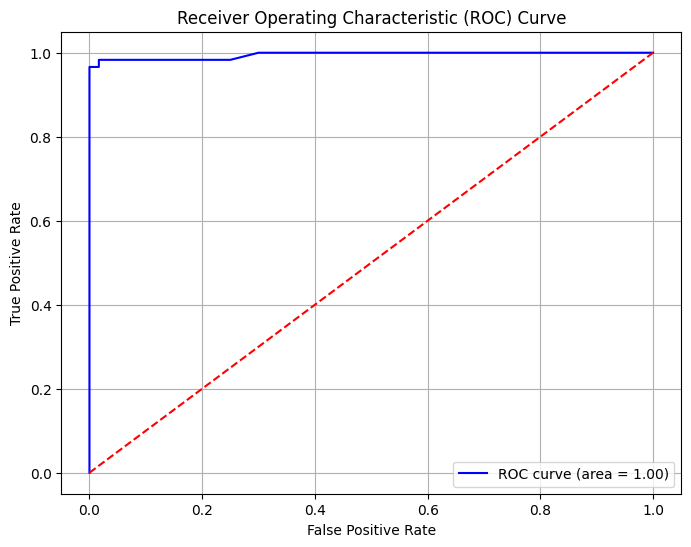

Best threshold based on Youden's J statistic: 0.0693
Confusion matrix at new threshold 0.06928280978944056:
 [[59  1]
 [ 1 58]]
Recall: 0.9830508474576272
Precision: 0.9830508474576272
F1 Score: 0.9830508474576272
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        60
           1       0.98      0.98      0.98        59

    accuracy                           0.98       119
   macro avg       0.98      0.98      0.98       119
weighted avg       0.98      0.98      0.98       119



In [24]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_test_proba = stacking_clf.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)

roc_auc = roc_auc_score(y_test, y_test_proba)
print(f"AUC Score: {roc_auc:.4f}")

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()

J_scores = tpr - fpr
best_threshold = thresholds[np.argmax(J_scores)]
print(f"Best threshold based on Youden's J statistic: {best_threshold:.4f}")

y_test_pred_new_threshold = (y_test_proba >= best_threshold).astype(int)

print(f"Confusion matrix at new threshold {best_threshold}:\n {confusion_matrix(y_test, y_test_pred_new_threshold)}")
print(f"Recall: {recall_score(y_test, y_test_pred_new_threshold)}")
print(f"Precision: {precision_score(y_test, y_test_pred_new_threshold)}")
print(f"F1 Score: {f1_score(y_test, y_test_pred_new_threshold)}")
print(classification_report(y_test, y_test_pred_new_threshold))



## **7) SAVE THE FINAL MODEL**

In [25]:
import joblib

joblib.dump({'model': stacking_clf, 'threshold': best_threshold}, 'stacking_model_with_threshold.pkl')

['stacking_model_with_threshold.pkl']